In [3]:
# matplotlib puede mostrar imagenes, la combinacion entre matplotlib y numpy permite manipular imagenes
# la libreria scipy permite hacer calculos complejos, analisis estadisticos y hay subpaquetes de scipy, por ejemplo tratamiento de imagenes: (scikit image)-> sirve para segmentar imagenes
# scikit learning permite hacer machine learning en imagenes
# from scipy import ndimage -> ya no funciona bien, ahora es necesario importar Scikit Image o scikit-learn
# una imagen es un arreglo de numpy bidimensional, donde los cuadros corresponden a los pixeles

from skimage import data, io # Libreria skimage data es una sublibreria y la libreria io (input-output) leer imagen de archivos y escribir imagen
# data es para tener acceso a imagenes de prueba
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



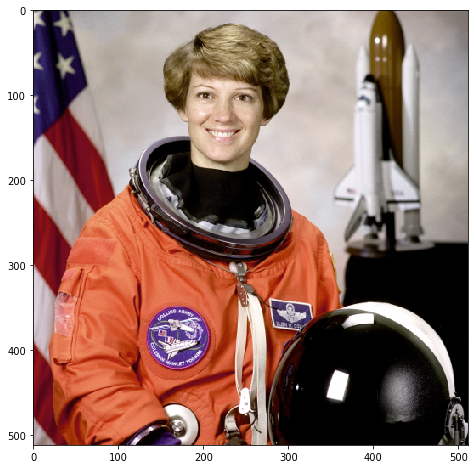

In [6]:
A=data.astronaut()
plt.figure(figsize =(8,8)) # aumentar el tamaño de la imagen en pulgadas, sistema americano.
plt.imshow(A)
# skimage la libreria tiene varias imagenes cargadas, las imagenes se pueden ver en https://scikit-image.org/docs/dev/search.html?q=data&check_keywords=yes&area=default ,  buscar ,data.

In [7]:
io.imsave('astronautalocal.png',A) # Hacer una copia local de la imagen en el Home del servidor de Jupyter

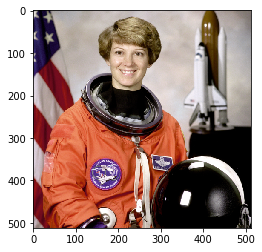

In [8]:
A1= io.imread('astronautalocal.png')  # llamar ahora la imagen de dsico 
plt.imshow(A1)

In [15]:
print (A.shape) # para saber el tamaño de la imagen
print (A.dtype) # tipo de arreglo de los datos de la imagen, unit8 quiere decir entero de 8 bits (cada pixel puede tener entre entre 0 y 255)

(512, 512, 3)
uint8


In [14]:
A1.shape

(512, 512, 3)

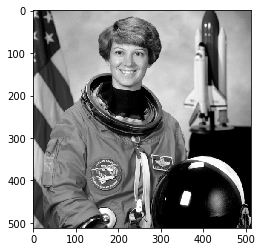

In [17]:
A_grey =(A.sum(2)/3).astype(np.uint8)   # convertir imagen a escala de grises, se suman los valores de RGB y se saca un promedio,(A.sum(2)/3)-> coja el arreglo A y sumela en el eje 2 (por que en numpy los ejes son axes 0, axes 1, axes 2), el resto dejelos igual y luego divida entre tres
# al hacer la suma queda un numero de punto flotante en python 3, por eso tiene que reconvertirse a un numero entreo con .astype(np.uint8)
plt.imshow(A_grey, cmap= plt.cm.gray)

In [19]:
print(A_grey.shape)
print(A_grey.dtype)

(512, 512)
uint8


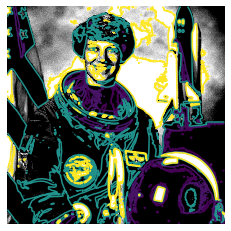

In [25]:
# Hacer ajuste de contraste , si la imagene esta muy oscura.
plt.imshow(A_grey, cmap=plt.cm.gray,  vmin=150, vmax=200)
plt.axis('off')
plt.contour(A_grey, levels=(0,10,100,200))    # poner contornos asociados al nivel de gris, pone lineas a diferentes valores de nivel de gris, en este caso sobre 0,10,100,200, -> esa lista puede ser tan larga como se desee


(-0.5, 49.5, 39.5, -0.5)

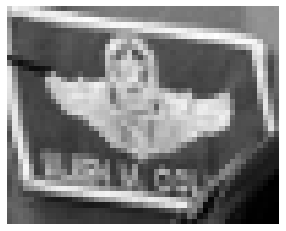

In [26]:
# Hacer slicing o rebanado de los arreglos, seccionar regiones de la imagen asociado a los indices de la imagen
# En numoyEL ordenamiento va de arriba a abajo y de izquierda a derecha (El eje x va hacia abajo , el eje y hacia la derecha)

parche=A_grey[340:380, 280:330]
plt.imshow(parche, cmap=plt.cm.gray)
plt.axis('off')    
# La imagen se lee de arriba hacia abajo, los indices 340:380 son en x que es  hacia abajo, y los indices 280:330 corresponden a y que va (->)


(-0.5, 49.5, 39.5, -0.5)

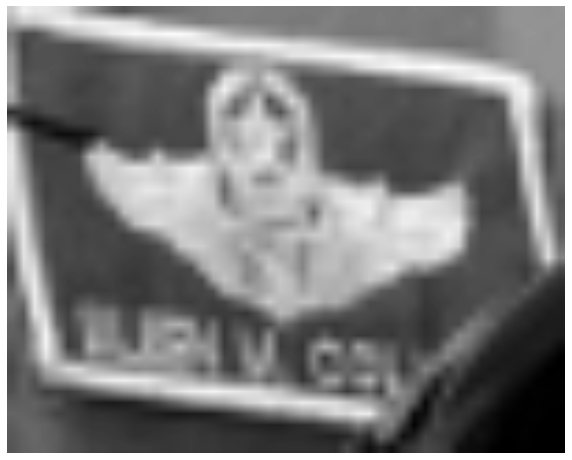

In [31]:
plt.figure(figsize =(10,10)) # Redimensionar la imagen para que sea mas grande
plt.imshow(parche, cmap=plt.cm.gray, interpolation='bilinear') # Hacer interpolacion bilineal sobre la imagen para poder leer mejor lo que dice en el parche
plt.axis('off')

In [32]:
A_grey[0,40]

76

In [33]:
A_grey[20:30,40:50] # Valores en grises definidos en un cuadro

array([[154, 142, 131, 126, 114, 110, 118, 133, 155, 171],
       [142, 131, 120, 114, 109, 106, 123, 138, 155, 169],
       [124, 108,  97, 101, 100,  95, 113, 131, 148, 167],
       [106,  77,  64,  74,  80,  84,  98, 126, 143, 163],
       [ 89,  46,  32,  44,  55,  66,  83, 113, 137, 160],
       [ 71,  30,  27,  32,  32,  45,  61,  99, 130, 153],
       [ 52,  27,  26,  30,  30,  29,  41,  82, 119, 148],
       [ 39,  26,  22,  29,  26,  26,  34,  61, 100, 139],
       [ 25,  30,  27,  30,  27,  23,  23,  47,  97, 127],
       [ 29,  31,  29,  26,  24,  25,  24,  37,  82, 119]], dtype=uint8)

In [36]:
# los arreglos se pueden camiar los valores en grises de la imagen
A_grey[340:380,280:330]=255 # Igualar arreglo a un escalar

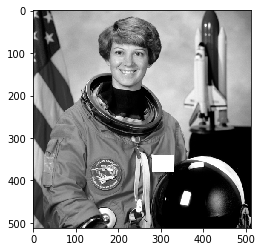

In [37]:
plt.imshow(A_grey, cmap=plt.cm.gray)

In [41]:
lx, ly = A_grey.shape  #Tamaño de la imagen

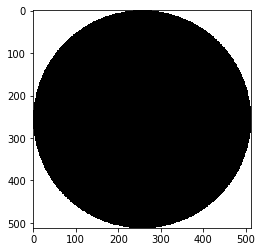

In [53]:
X, Y = np.ogrid[0:lx, 0:ly] # Hacerle un marco a la imagen , se definen unos arreglos que son del tamaño de la imagen en X y en Y
mask = (X -lx/2)**2 + (Y - ly/2)**2 > lx*ly/4 # Define un circulo
plt.imshow(mask, cmap=plt.cm.gray)

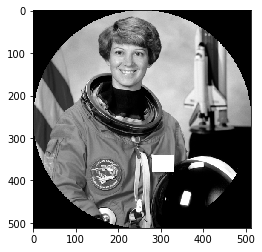

In [51]:
A_grey [mask] = 0
plt.imshow(A_grey, cmap=plt.cm.gray)

In [48]:
# Hacer calculos estadisticos sobre la imagen
print(A_grey.mean(), A_grey.max(), A_grey.min())

115.35380172729492 255 0


<BarContainer object of 20 artists>

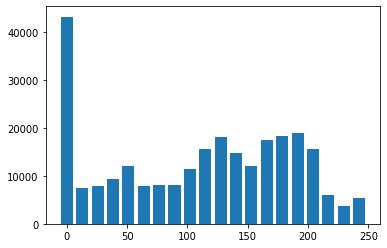

In [49]:
a,b= np.histogram(A_grey, bins=20) # bins es en cuantas casillas se van a separar las barras en este caso = 20
a.shape, b.shape
plt.bar(b[:-1],a,10)
#plt.show()